# 1.Univariate Regression
In this part you have to first we try and implement the building blocks for a linear regression implementation. First of all, we need to make sure to have the necessary libraries installed.

In [278]:
# install numpy and pandas first. If you have them installed already then pip won't install them
# and you will get requirement already satisfied message. That's normal.
!pip install numpy
!pip install pandas
import numpy as np
import pandas as pd
np.random.seed(2)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Now let's load some points from the  "unilinear.csv" file:

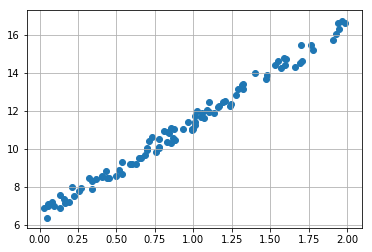

In [279]:
# Read the X and y values from unilinear.csv
datapoints = np.genfromtxt('unilinear.csv', delimiter=',')
X = datapoints[:,0]
# print(X.shape)
X = X.reshape(-1,1)
# print(X.shape)
X.sort(axis=0)


y = datapoints[:,1]
y = y.reshape(-1,1)

# let us plot the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.grid()

## Exercise 1.1
Implement the closed form of linear regression which was taught in the lecture:
##### Hints: 
1. Add a column of 1's to X using `np.hstack`. This column of 1's models for the y-intercept ($w_0$). 
2. Use `inv` function in numpy to find the inverse of a matrix. inv is defined in `numpy.linalg` module so will need to import it from it. 
3. To multiply two matrices `a` and `b`, use the following notation in python `a.dot(b)`
4. To transpose a matrix `c` use `c.T`

In [280]:
# TODO
# Write your solution here
one_col = np.ones(X.shape[0])
one_col = one_col.reshape(-1,1)
_X = np.hstack((one_col,X))
X_T = np.ndarray.transpose(_X)
w_hat = np.matmul(np.linalg.inv(np.matmul(X_T,_X)),np.matmul(X_T,y))

In [281]:
# TODO
# Check the values of w_hat vector
print(*w_hat)

[6.45478709] [5.02129039]


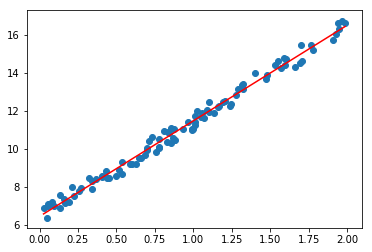

In [282]:
# TODO
# plot the estimated line with datapoints showing 
y_pred = np.matmul(_X,w_hat)
plt.scatter(X, y)
plt.plot(X,y_pred,color='red')

## Exercise 1.2
### Implementation of Gradient Descent
Calculate the loss function of Mean Square Error (MSE):

In [283]:
def loss_function(X, y, w0, w1):
    # TODO
    # calculate the sum of squared errors for the current W vector
    n = X.shape[0]
    y_pred = np.multiply(X,w1)+w0
    mse = (1/n) * np.sum((y-y_pred)**2)
    return mse

Next you need to evaluate the current function with respect to w0 and w1. In order to do that caculate the one step derivatives of the MSE with respect to w0 and w1:

In [284]:
def compute_gradient(X, y, w0, w1):
    # TODO
    # calculate the gradient vector of partial derivatives of MSE with the formulat that you have found
    n = X.shape[0]
    y_pred = np.multiply(X,w1)+w0
    w0_par_der = (-2/n) * np.sum((y-y_pred))
    w1_par_der = (-2/n) * np.sum(np.multiply((y-y_pred),X.T))
    # make a gradient vector from the partial derivatives    
    gradient_mse = np.array([w0_par_der, w1_par_der])
    return gradient_mse

Now you need to update your $w_0$ and $w_1$ using a certain learning rate: 

In [285]:
def update_parameters(w0, w1, w0_par_der, w1_par_der, learning_rate):
    
    # make a vector of weights
    weight_vector = np.array([w0, w1])
    # make a gradient vector from the partial derivatives    
    gradient_mse = np.array([w0_par_der, w1_par_der])
    # TODO
    # update the vector of W (w0,w1) using the update rule and return the value of updated weights
    updated_weight_vector = weight_vector - learning_rate*(gradient_mse)
    # return the updated weight vector as a list
    return np.ndarray.tolist(updated_weight_vector)

The next step is to run multiple iterations of gradient descent:

In [286]:
def run_optimization(X, y, starting_w0, starting_w1, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    # TODO
    # run the Gradient descent for num_iterations
    for i in range(num_iterations):
        w0_par_der, w1_par_der = compute_gradient(X, y, w0, w1)
        w0, w1 = update_parameters (w0, w1, w0_par_der, w1_par_der, learning_rate)
        mse = loss_function(X, y, w0, w1)
        print(f'Iteration {i+1}: w0={w0:0.5f}, w1={w1:0.5f}, mse={mse:0.5f}')
    return [w0, w1, mse]

Now to test your implementation :

In [287]:
X = X.flatten()
y = y.flatten()
num_iterations = 40
learning_rate = 0.1
starting_w0 = 0 # initial y-intercept guess
starting_w1 = 0 # initial slope guess

[w0,w1,_] = run_optimization(X, y, starting_w0, starting_w1, learning_rate, num_iterations)

Iteration 1: w0=2.21493, w1=2.32156, mse=47.34810
Iteration 2: w0=3.55968, w1=3.71134, mse=17.37766
Iteration 3: w0=4.37975, w1=4.53985, mse=6.48588
Iteration 4: w0=4.88335, w1=5.03039, mse=2.52335
Iteration 5: w0=5.19596, w1=5.31750, mse=1.07772
Iteration 6: w0=5.39322, w1=5.48225, mse=0.54653
Iteration 7: w0=5.52071, w1=5.57351, mse=0.34778
Iteration 8: w0=5.60591, w1=5.62070, mse=0.27009
Iteration 9: w0=5.66539, w1=5.64156, mse=0.23667
Iteration 10: w0=5.70913, w1=5.64676, mse=0.21963
Iteration 11: w0=5.74317, w1=5.64274, mse=0.20881
Iteration 12: w0=5.77114, w1=5.63336, mse=0.20051
Iteration 13: w0=5.79524, w1=5.62095, mse=0.19336
Iteration 14: w0=5.81681, w1=5.60691, mse=0.18687
Iteration 15: w0=5.83664, w1=5.59208, mse=0.18084
Iteration 16: w0=5.85524, w1=5.57694, mse=0.17517
Iteration 17: w0=5.87290, w1=5.56180, mse=0.16984
Iteration 18: w0=5.88982, w1=5.54683, mse=0.16481
Iteration 19: w0=5.90611, w1=5.53212, mse=0.16006
Iteration 20: w0=5.92185, w1=5.51774, mse=0.15558
Iterati

Test it again with learning rate of 1:

In [288]:
X = X.flatten()
y = y.flatten()
num_iterations = 40
learning_rate = 1
starting_w0 = 0 # initial y-intercept guess
starting_w1 = 0 # initial slope guess

w0_prime,w1_prime,_ = run_optimization(X, y, starting_w0, starting_w1, learning_rate, num_iterations)

Iteration 1: w0=22.14932, w1=23.21556, mse=1145.57670
Iteration 2: w0=-42.71926, w1=-46.74664, mse=10128.04447
Iteration 3: w0=150.88767, w1=160.63065, mse=89555.47553
Iteration 4: w0=-424.31690, w1=-456.50662, mse=791888.03243
Iteration 5: w0=1286.48998, w1=1378.28758, mse=7002221.73248
Iteration 6: w0=-3800.54553, w1=-4077.94397, mse=61916725.58570
Iteration 7: w0=11326.57248, w1=12146.66334, mse=547494936.94083
Iteration 8: w0=-33655.65605, w1=-36099.34411, mse=4841191188.06990
Iteration 9: w0=100104.67708, w1=107366.05570, mse=42807943125.80430
Iteration 10: w0=-297648.20061, w1=-319246.17412, mse=378526673187.83051
Iteration 11: w0=885119.37920, w1=949338.17515, mse=3347099436517.65430
Iteration 12: w0=-2631986.72972, w1=-2822954.81277, mse=29596526299163.98047
Iteration 13: w0=7826564.67594, w1=8394426.39002, mse=261705511171927.09375
Iteration 14: w0=-23273235.49838, w1=-24961848.36840, mse=2314115308177042.50000
Iteration 15: w0=69205878.87034, w1=74227173.11104, mse=2046242601

Compare your results with the sklearn version of linear regression:

In [289]:
# install sklearn if it isn't installed already 
!pip install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [290]:
# import LinearRegression class from sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# make a lin_reg object form the LinearRegression class
lin_reg = LinearRegression()
X = np.reshape(X,(100,1))
y = np.reshape(y,(100,1))
lin_reg.fit(X, y)
print('y-intercept w0:', lin_reg.intercept_)
print('slope w1:', lin_reg.coef_)

y-intercept w0: [6.45478709]
slope w1: [[5.02129039]]


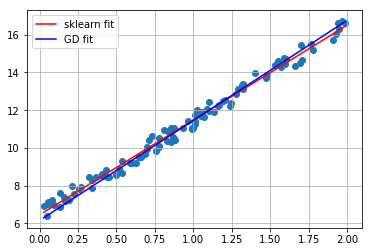

In [291]:
import matplotlib.pyplot as plt
%matplotlib inline
# TODO
# plot the original data points as a scatter plot
plt.scatter(X, y)
# plot the line that fits these points. 
y_ = lin_reg.predict(X) # np.multiply(X,lin_reg.coef_) + lin_reg.intercept_
y_GD = np.multiply(X,w1) + w0


plt.plot(X, y_, color='r', label='sklearn fit')
plt.plot(X, y_GD, color='b', label='GD fit')
plt.xlabel('')
plt.ylabel('')
plt.grid()
plt.legend(loc='best')

# 2.Multivariate Regression

In this part we will try to work with more complicated datasets. In order to import datasets into your models first we need to use pandas library for python:

In [292]:
import pandas as pd

# make a dataframe of the data
df = pd.read_csv('Psychology grades.csv')

# show first five rows of df
df.head(n=5)

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


Next we need to seperate features and labels:

In [293]:
# Extract the last column and set it to the output or dependent varaible y
y = df[['FINAL']]

# Remove the first column and set the rest of the dataframe to X. This is the set of indepedent variables
X = df.drop(columns=['FINAL'])

# show first five rows of X
X.head(n=5)

,EXAM1,EXAM2,EXAM3
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70


In [294]:
# show first five rows of y
y.head(n=5)

,FINAL
0,152
1,185
2,180
3,196
4,142


## Exercise 2.1
Now fit a Multivariate Linear Regression model to it.

##### Hint: 
Use LinearRegression from sklearn in order to fit the model.

In [295]:
# TODO
# fit a linear regression using sklearn. LinearRegression to the exam dataset and show the values of intercept_ and coef_
lin_reg.fit(X, y)

# Display the learned parameters
lin_reg.intercept_, lin_reg.coef_

(array([-4.3361024]), array([[0.35593822, 0.54251876, 1.16744422]]))

find out the grade for 50, 60 and 70 in exams:

In [296]:
# TODO
# use the predict method
lin_reg.predict(np.array([[50,60,70]]))

array([[127.73302913]])

Now let's load the datapoints from "nonlinear.csv" and "nonlinear_val.csv" file:

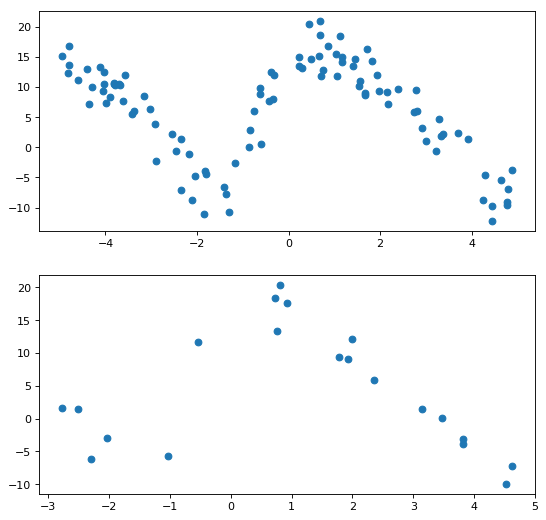

In [297]:
import numpy as np
import matplotlib.pyplot as plt

datapoints = np.genfromtxt('nonlinear.csv', delimiter=',')
datapoints_val = np.genfromtxt('nonlinear_val.csv', delimiter=',')

X = datapoints[:,0]
X = X.reshape(-1,1)
X.sort(axis=0)


y = datapoints[:,1]
y = y.reshape(-1,1)


X_val = datapoints_val[:,0]
X_val = X_val.reshape(-1,1)
X_val.sort(axis =0)

y_val = datapoints_val[:,1]
y_val = y_val.reshape(-1,1)

# plot it
fig , (ax1,ax2) = plt.subplots(2,figsize=(8, 8), dpi=80)

ax1.scatter(X,y)
ax2.scatter(X_val,y_val)

## Exercise 2.2
Fit a normal linear regression on training dataset and check the MSE on each training and validation sets and plot the resulting functions on two separate plots with each corresponding to each set.

62.55930084175354
82.28700425007989


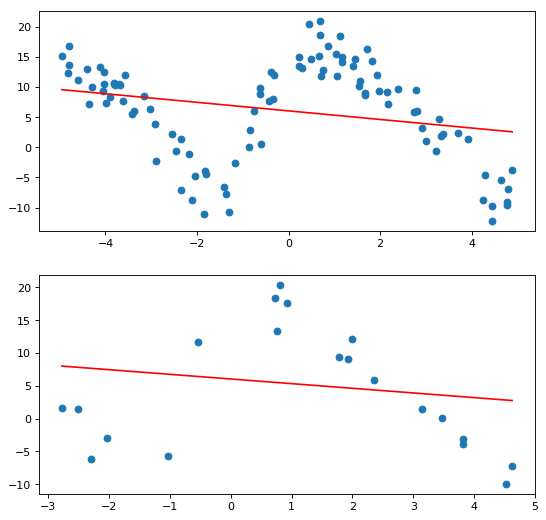

In [298]:
from sklearn.metrics import mean_squared_error
# TODO
# Use sklearn to fit a linear regression on the training data
lin_reg.fit(X, y)
y_ = lin_reg.predict(X)
y_val_ = lin_reg.predict(X_val)
# use mean_squared_error from sklearn.metrics to calculate MSE
print(mean_squared_error(y,y_))
print(mean_squared_error(y_val,y_val_))

# plot the function 
fig , (ax1,ax2) = plt.subplots(2,figsize=(8, 8), dpi=80)
ax1.scatter(X,y)
ax2.scatter(X_val,y_val)

ax1.plot(X,y_,color='r')
ax2.plot(X_val,y_val_,color='r')

Now define an RBF function as your basis function

In [299]:
def RBF(X,C,eps):
    out = np.exp(-np.square(X-C)/eps)
    return out

Transform datapoints according to the RBF functions with centers at (-5,-4,...,4,5) with epsilon of 0.1 to a 11-dimensional space (number of colums = 11):
##### Hint: 
Use `np.hstack` in order to add new columns to the matrix

In [300]:
# TODO
# transform X and X_val to 12 dimensional space using RBF functions 
C = np.array(range(-5,6))
eps =0.1
X_RBF = RBF(X,C,eps)
X_RBF_val = RBF(X_val,C,eps)
# check the dimensionf of transformed datapoints (it should be (100,11) and (20,11) )
print(X_RBF.shape)
print(X_RBF_val.shape)

(100, 11)
(20, 11)


Try to fit a linear regression on the new X_RBF:

22.674391620742497
23.763442433934834


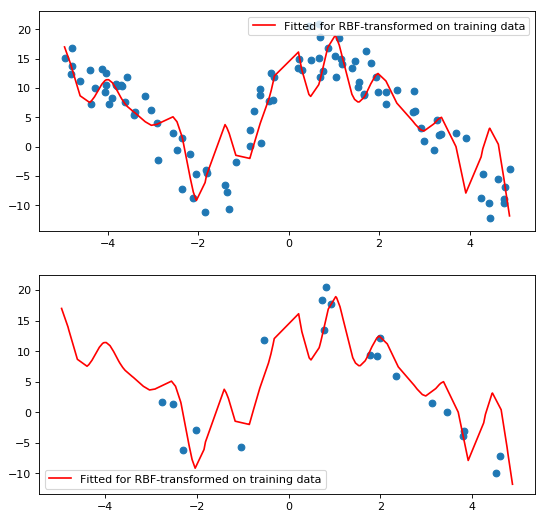

In [301]:
# TODO
# Fit a linear regression model to the RBF-transformed data
clf = LinearRegression()
clf.fit(X_RBF,y)

# find the predicted values
y_= clf.predict(X_RBF)
y_val_= clf.predict(X_RBF_val)

#find the mean square error on the training and validation sets
print(mean_squared_error(y,y_))
print(mean_squared_error(y_val,y_val_))


fig , (ax1,ax2) = plt.subplots(2,figsize=(8, 8), dpi=80)
ax1.plot(X, y_, color='r', label='Fitted for RBF-transformed on training data')
ax2.plot(X, y_, color='r', label='Fitted for RBF-transformed on training data')

ax1.scatter(X,y)
ax2.scatter(X_val,y_val)


ax1.legend(loc='best')
ax2.legend(loc='best')

Now repeat the same procedure but this time put your centers at (-5,-4.9,-4.8,...,4.8,4.9). (your new space should have 100 dimensions)

In [302]:
# TODO
# transform X to 100 dimensions
C = np.array(range(-50,50,1))/10
X_RBF_2 = RBF(X,C,eps)
X_RBF_val_2 = RBF(X_val,C,eps)
# check the number of dimensions
print (X_RBF_2.shape)
print (X_RBF_val_2.shape)

(100, 100)
(20, 100)


0.03430258632452923
556560585306810.8


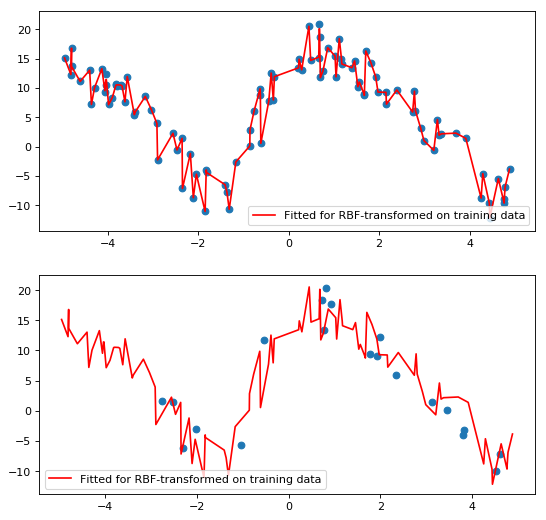

In [303]:
# TODO
# repeat the last part on the new data
clf = LinearRegression()
clf.fit(X_RBF_2,y)

y2_ = clf.predict(X_RBF_2)

y2_val_= clf.predict(X_RBF_val_2)


print(mean_squared_error(y,y2_))
print(mean_squared_error(y_val,y2_val_))

fig , (ax1,ax2) = plt.subplots(2,figsize=(8, 8), dpi=80)
ax1.plot(X, y2_, color='r', label='Fitted for RBF-transformed on training data')
ax2.plot(X, y2_, color='r', label='Fitted for RBF-transformed on training data')

ax1.scatter(X,y)
ax2.scatter(X_val,y_val)


ax1.legend(loc='best')
ax2.legend(loc='best')

In order to solve overfitting use the Ridge regularization. plot the resulting fit and compare it with the last one.
##### Hint: 
Use the `Ridge` from  `sklearn.linear_model` with `alpha=1`

5.583132917278014
9.710038521599476


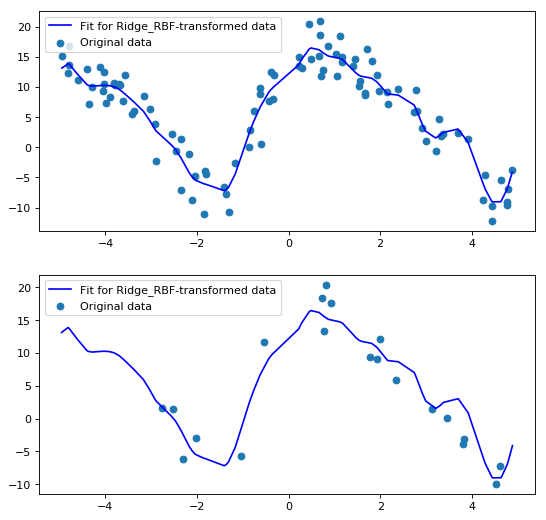

In [304]:
from sklearn.linear_model import Ridge

# Create Ridge regression object from Ridge class
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_RBF_2, y)

yRidge_ = ridge_reg.predict(X_RBF_2)
yRidge_val_ = ridge_reg.predict(X_RBF_val_2)

# plot original data and predicted fit
print(mean_squared_error(y,yRidge_))
print(mean_squared_error(y_val,yRidge_val_))


fig , (ax1,ax2) = plt.subplots(2,figsize=(8, 8), dpi=80)

ax1.scatter(X, y, label='Original data')
ax1.plot(X, yRidge_, color='b', label='Fit for Ridge_RBF-transformed data')

ax2.scatter(X_val, y_val, label='Original data')
ax2.plot(X, yRidge_, color='b', label='Fit for Ridge_RBF-transformed data')

ax1.legend(loc='best')
ax2.legend(loc='best')

# 3. Logistic Regression

First we need to load a dataset. 

In [305]:
from sklearn import datasets
iris = datasets.load_iris()

# iris is a dictionary of key-value pairs. Each key-value pairs contains some information about the dataset.
# Lets display a list of these keys and see what they hold
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

- `data`: holds the data of sepal and petal lengths and widths in four columns,
- `target`: holds the class of each flower. These class are encoded as 0, 1, and 2,
- `target_names`: holds the names of each of the flower classes,
- `DESCR`: contains a detailed description of the dataset, and
- `feature_names`: contains a list of name of the columns of data

load the petal width of the Iris-Versicolor and plot the data according to the labels of 1 and 0 (1 if Iris-Virginica, else 0)

In [306]:
iris['DESCR']

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [307]:
# let us get the petal width. It is present in the 4th column of data
X = iris["data"][:, 3] 
X = X.reshape(-1,1)
X.sort(axis=0)

# lets define a binaray variable that encodes whether a flower is Iris-Versicolor or not
# Iris_virginca flower is encoded as a 2 in target  
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

Text(0,0.5,'Iris-Virginica(1) \n Not Iris-Virginica(0)')

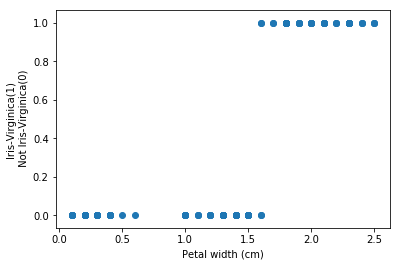

In [308]:
plt.scatter(X, y)
plt.xlabel('Petal width (cm)')
plt.ylabel('Iris-Virginica(1) \n Not Iris-Virginica(0)')

Fit a linear regression model to the Iris pedal width for Iris-Versicolor and plot the results.

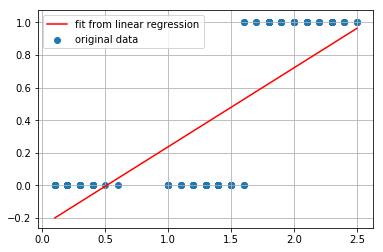

In [309]:
# TODO
# Fit a linear regression to the petal width
clf = LinearRegression()
clf.fit(X, y)
y_ = clf.predict(X)

plt.scatter(X, y, label='original data')
plt.plot(X, y_, color='r', label='fit from linear regression')
plt.legend(loc='best')
plt.grid()

Now fit a logistic regression to the same feature and compare the results to the linear regression in a plot.

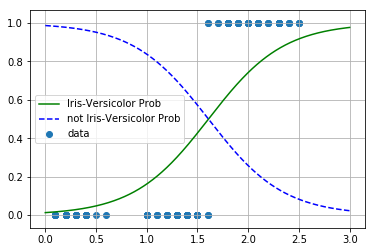

In [310]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = clf.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Versicolor Prob")
plt.plot(X_new, y_proba[:, 0], "b--", label="not Iris-Versicolor Prob")
plt.scatter(X, y, label='data')
plt.grid()

plt.legend(loc='best')


Now import the features of sepal width and length from the dataset and try to fit a logistic regression on these features and and classes. plot the Plot the decision boundaries 
##### Hint:
1. Make an object from LogisticRegression class in sklearn as following: 

`multiclass_logreg_obj = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)`.

`multiclass_logreg_obj` is just a name. It could be any (appropriate) name you like.

In [311]:
from sklearn.model_selection import train_test_split
# TODO
# prepare the data
X = iris["data"][:, :2] 
# X = X.reshape(-1,1)
# X.sort(axis=0)
y =  (iris["target"]).astype(np.int)
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)
X = X_train
y = Y_train

Text(0.5,1,'Samples and Boundaries')

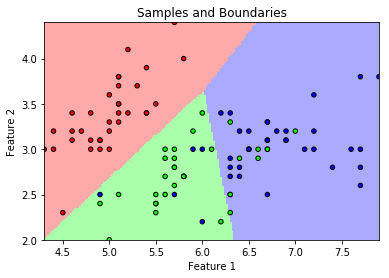

In [315]:
from matplotlib.colors import ListedColormap
# TODO 
# fit a multi class logistic regression to the dataset
clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
clf.fit(X, y)


# Step size in the mesh:
h = .02
# Light colors for decision boundaries plots:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# Bold colors for training points scatterplots:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


### Decision boundaries plotting:
# Generate the axis associated to the first feature: 
x_min = np.amin(X[:,0])
x_max = np.amax(X[:,0])

x_axis = np.arange(x_min, x_max, h)

# Generate the axis associated to the second feature:
y_min = np.amin(X[:,1])
y_max = np.amax(X[:,1])

y_axis = np.arange(y_min, y_max, h)


# Generate a meshgrid (2D grid) from the 2 axis:

x_grid, y_grid = np.meshgrid(x_axis, y_axis)

# Vectorize the grids into column vectors:
x_grid_vectorized = x_grid.flatten()
x_grid_vectorized = np.expand_dims(x_grid_vectorized, axis=1)
y_grid_vectorized = y_grid.flatten()
y_grid_vectorized = np.expand_dims(y_grid_vectorized, axis=1)

# Concatenate the vectorized grids:
concat_grids = np.concatenate((x_grid_vectorized, y_grid_vectorized),axis=1)


# Predict concatenated features to get the decision boundaries:
decision_boundaries = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
# Reshape the decision boundaries into a 2D matrix:
decision_boundaries = decision_boundaries.reshape(x_grid.shape)
# Plot the decision boundaries:
plt.figure()
plt.pcolormesh(x_grid, y_grid, decision_boundaries, cmap=cmap_light)
# Overlay the training points:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(np.amin(X[:,0]),np.amax(X[:,0]))
plt.ylim(np.amin(X[:,1]),np.amax(X[:,1]))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Samples and Boundaries')